# Домашняя работа по курсу "Прикладная теория графов" №1

В этом задании предлагалось проанализировать представления различных метрополитенов мира в виде графов на изоморфизм. В качестве примера я выбрал системы метро Нью-Йорка (без Стэйтен-Айлэнда; больше всего станций в мире &mdash; 360, 25 линий), Гамбурга (4 линии и 90 станций) и Нижнего Новгорода (всего лишь 15 станций на 2 линиях). Станции по линиям извлекались автоматически из OpenStreetMap, ознакомится можно в <b>scrape.py</b>. Получили список ребер как связей между остановками. Теперь создадим граф в NetworkX и нарисуем схемы.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

nn_graph = nx.read_edgelist("NN.txt")

In [2]:
print(nx.info(nn_graph))
nn_graph = nx.convert_node_labels_to_integers(nn_graph)

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667


(-1.1099673736831326,
 0.9976208127413728,
 -0.2139792562352492,
 0.21180269689438416)

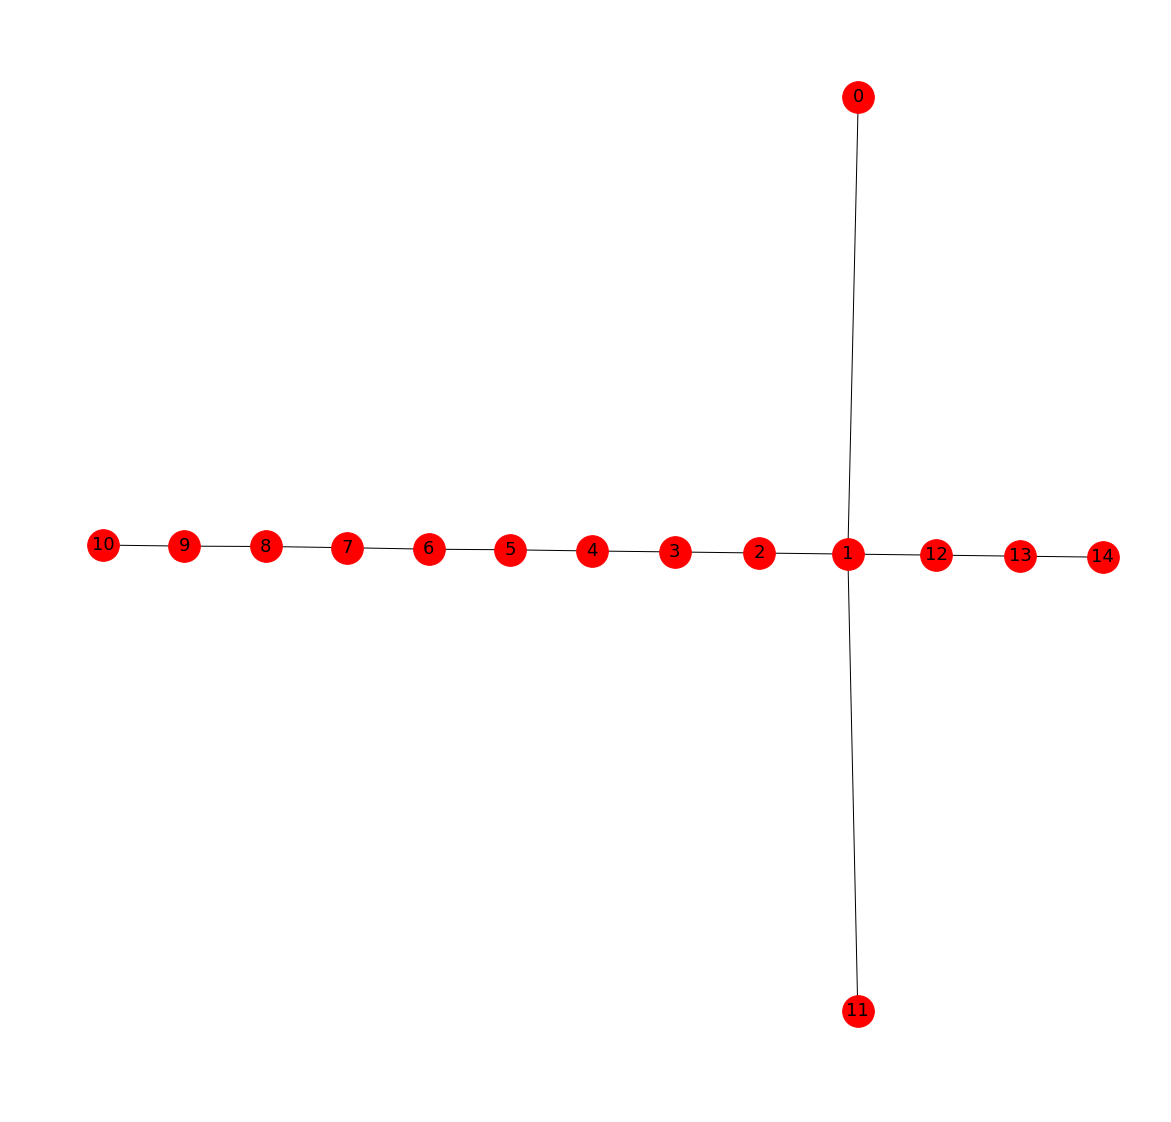

In [3]:
plt.figure(figsize=(20,20))
nx.draw_networkx(nn_graph, node_size=1000, pos=nx.kamada_kawai_layout(nn_graph), font_size=18)
plt.axis('off')

<img src='nn.png'></img>

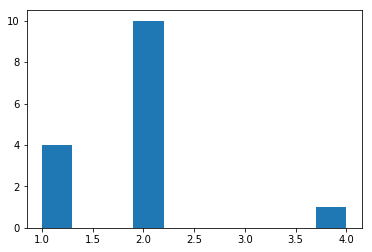

In [4]:
plt.hist(list(dict(nn_graph.degree()).values()))
plt.show()

Убедимся, что граф имеет одну компоненту связности. Значит, изолированных вершин нет.

In [5]:
print(nx.is_connected(nn_graph))

True


Мультиребер в графе тоже нет, единственная пересадка на одноименную станцию. Получается, граф годится для дальнейшей работы as is.

Далее нарисуем схему Гамбургского метрополитена.

In [6]:
hh_graph = nx.read_edgelist("HH.txt")
print(nx.info(hh_graph))
hh_graph = nx.convert_node_labels_to_integers(hh_graph)

Name: 
Type: Graph
Number of nodes: 90
Number of edges: 95
Average degree:   2.1111


(-1.0542748185417996,
 1.1126651834831527,
 -1.0263345730793851,
 1.0366537028240448)

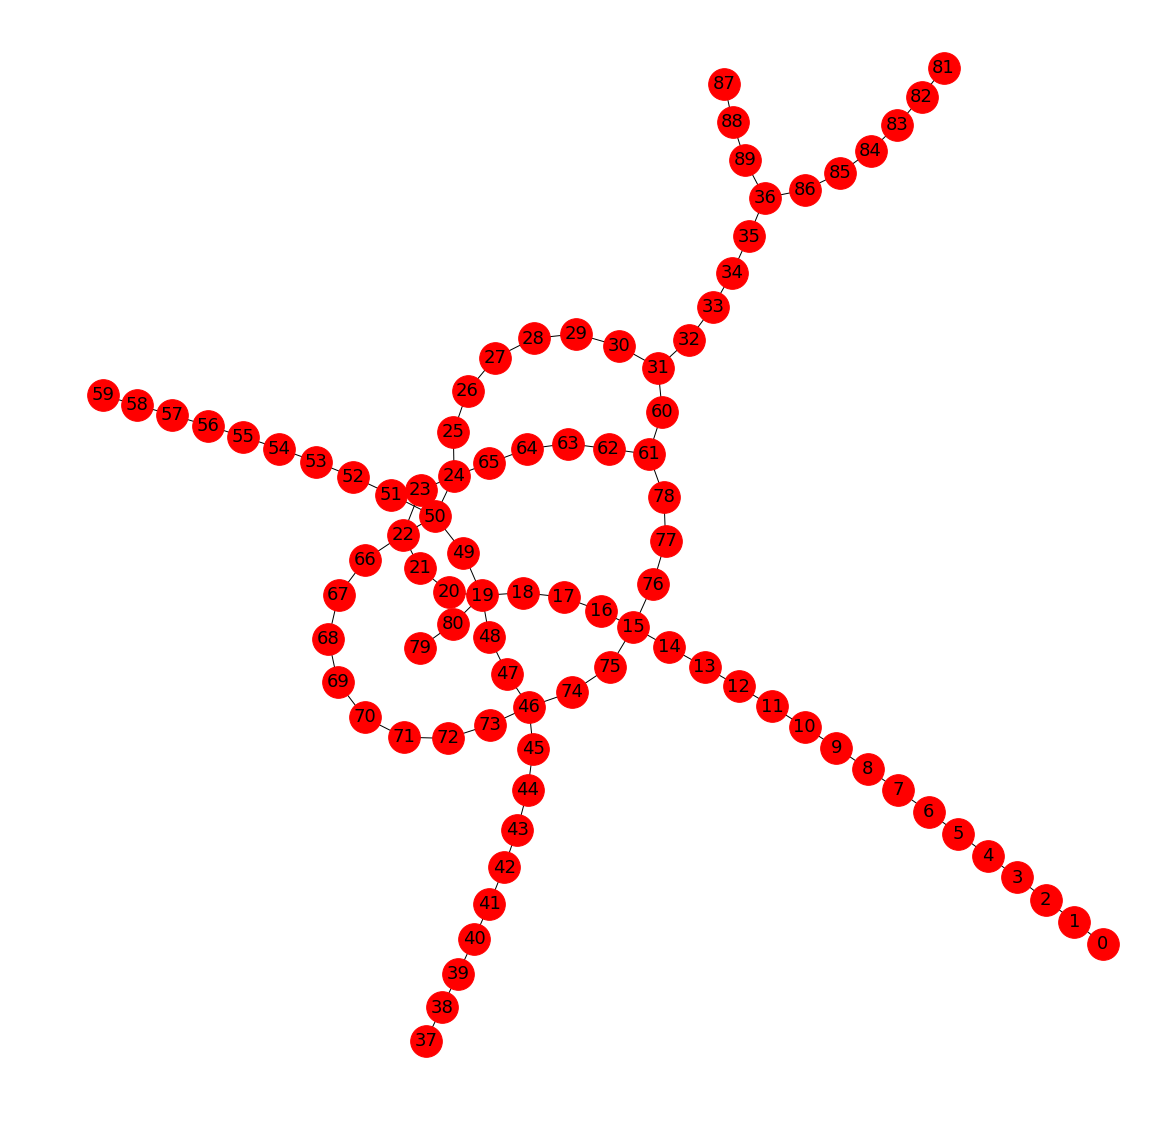

In [7]:
plt.figure(figsize=(20,20))
nx.draw_networkx(hh_graph, node_size=1000, pos=nx.kamada_kawai_layout(hh_graph), font_size=18)
plt.axis('off')

<img src='hh.png'></img>

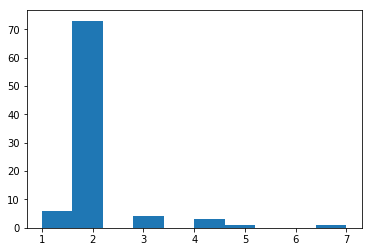

In [47]:
plt.hist(list(dict(hh_graph.degree()).values()))
plt.show()

In [10]:
print(nx.is_connected(hh_graph))

True


Здесь также изолированных вершин нет. Есть параллельные маршруты, но мультиребер в графе не появилось. Есть две пересадки между станциями с разными названиями. Это будет исправлено в <b>correct_schemes.py</b>. "Склеим" такие пересадки в станцию с одним названием. Теперь построим новый исправленный граф.

In [15]:
hh_graph = nx.read_edgelist("HH_corr.txt")
print(nx.info(hh_graph))
hh_graph = nx.convert_node_labels_to_integers(hh_graph)

Name: 
Type: Graph
Number of nodes: 88
Number of edges: 94
Average degree:   2.1364


(-1.101789597065637,
 1.1149277919842875,
 -1.0369175408633722,
 1.0686004412959231)

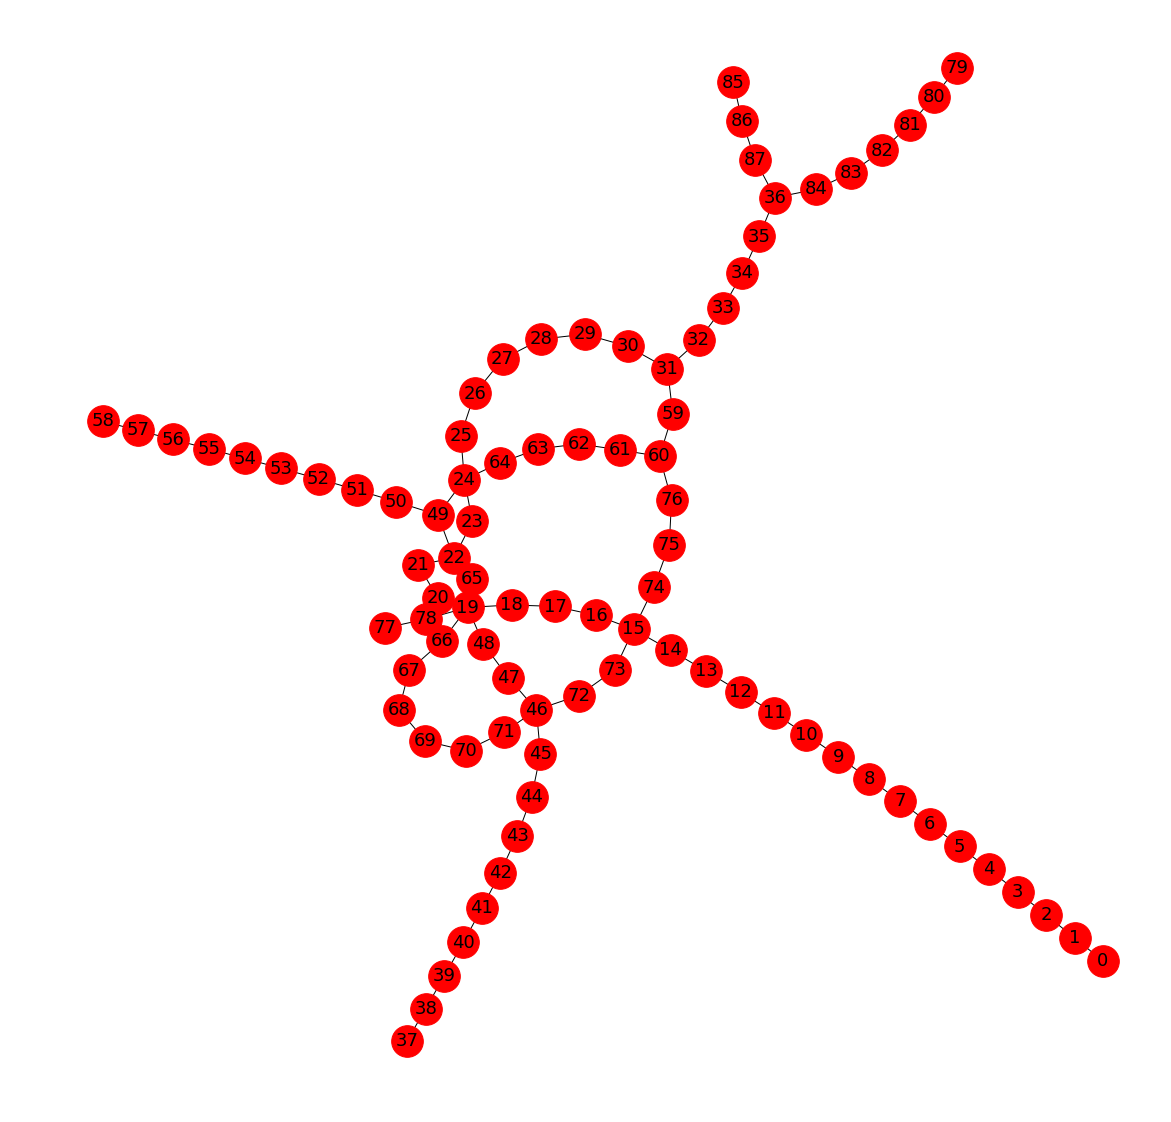

In [16]:
plt.figure(figsize=(20,20))
nx.draw_networkx(hh_graph, node_size=1000, pos=nx.kamada_kawai_layout(hh_graph), font_size=18)
plt.axis('off')

Самым сложным для препроцессинга было метро Нью-Йорка, даже по его реальной схеме черт голову сломит.

<img src='nyc.png'></img>

In [11]:
nyc_graph = nx.read_edgelist("NYC.txt")
print(nx.info(nyc_graph))
nyc_graph = nx.convert_node_labels_to_integers(nyc_graph)

Name: 
Type: Graph
Number of nodes: 360
Number of edges: 507
Average degree:   2.8167


(-0.8961908981269209,
 0.8768392560734855,
 -0.9280871643888084,
 1.1040022775508223)

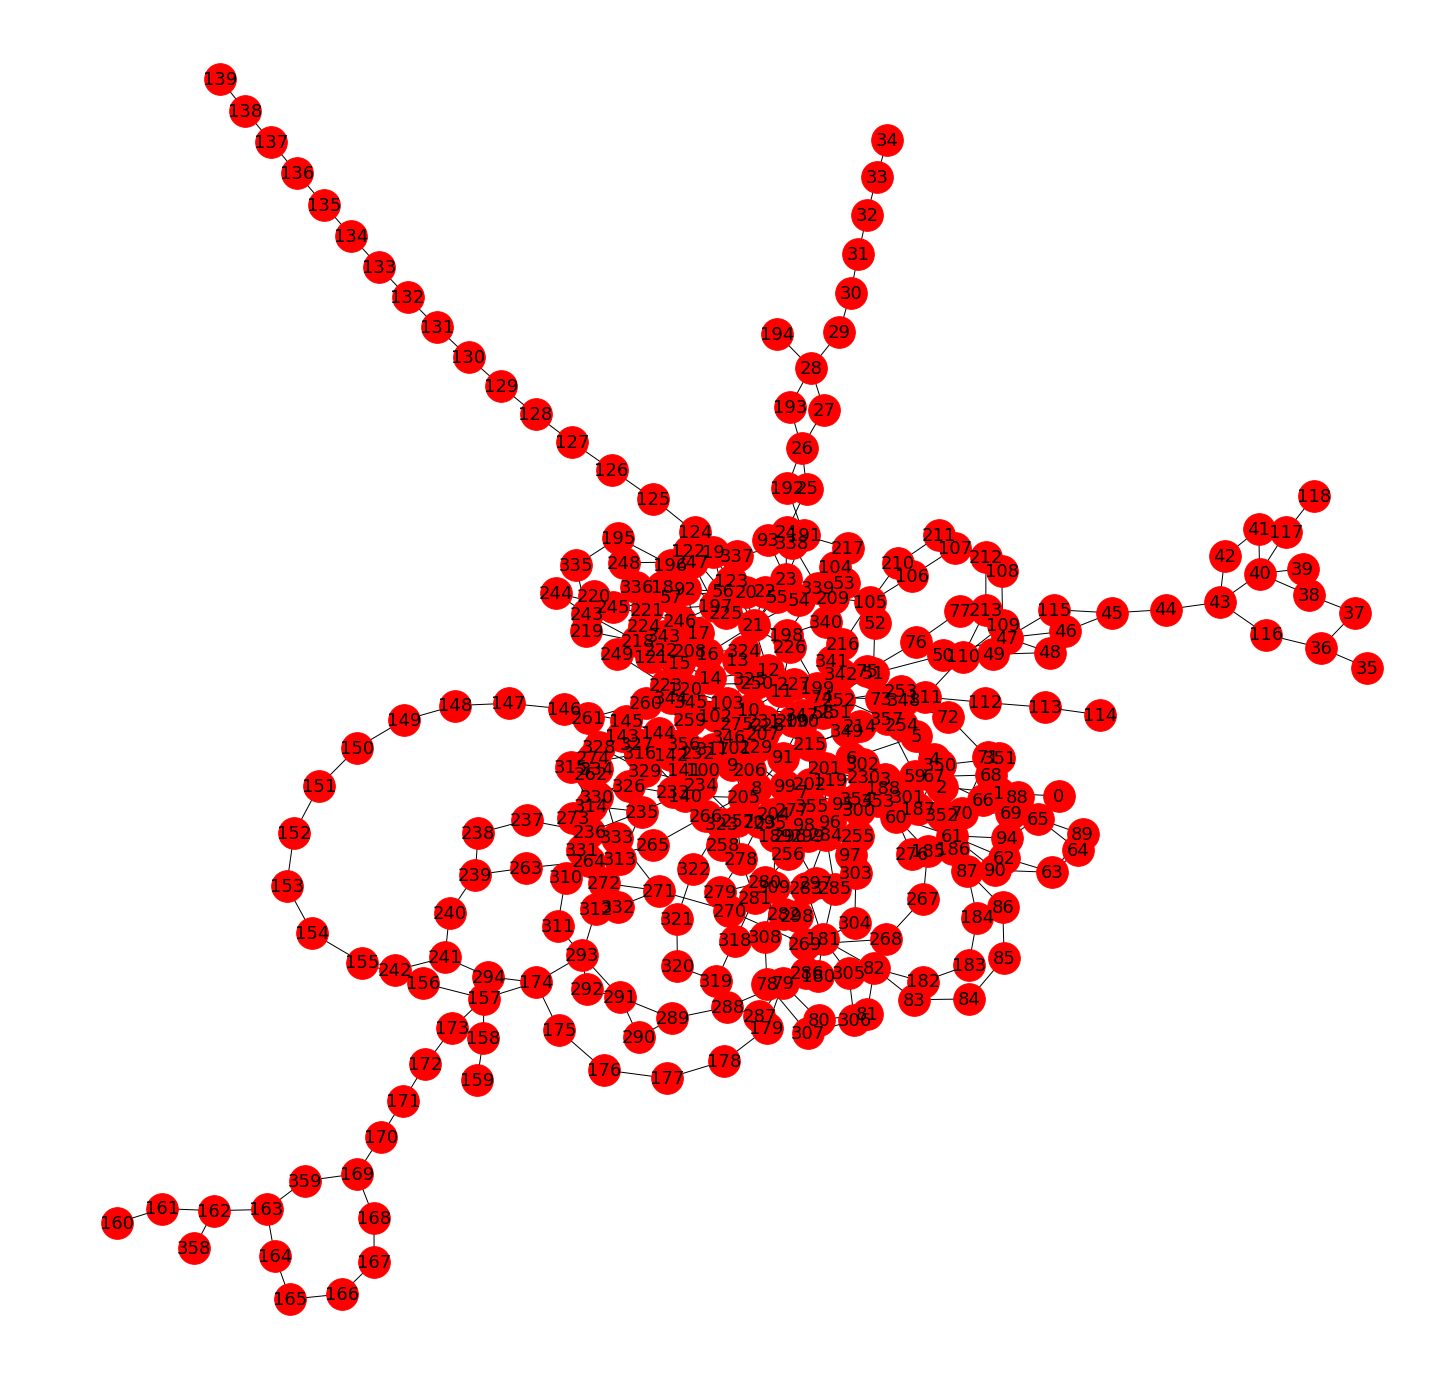

In [12]:
plt.figure(figsize=(25,25))
nx.draw_networkx(nyc_graph, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
plt.axis('off')

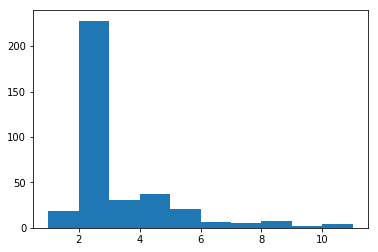

In [13]:
plt.hist(list(dict(nyc_graph.degree()).values()))
plt.show()

In [14]:
print(nx.is_connected(nyc_graph))

True


Здесь также потребуется удалить пересадки, но на этот раз их довольно много. Достанем исправленный список.

In [17]:
nyc_graph = nx.read_edgelist("NYC_corr.txt")
print(nx.info(nyc_graph))
nyc_graph = nx.convert_node_labels_to_integers(nyc_graph)

Name: 
Type: Graph
Number of nodes: 352
Number of edges: 505
Average degree:   2.8693


(-0.9596307908371743,
 0.9380628662629489,
 -0.978838846251713,
 1.1064190243061987)

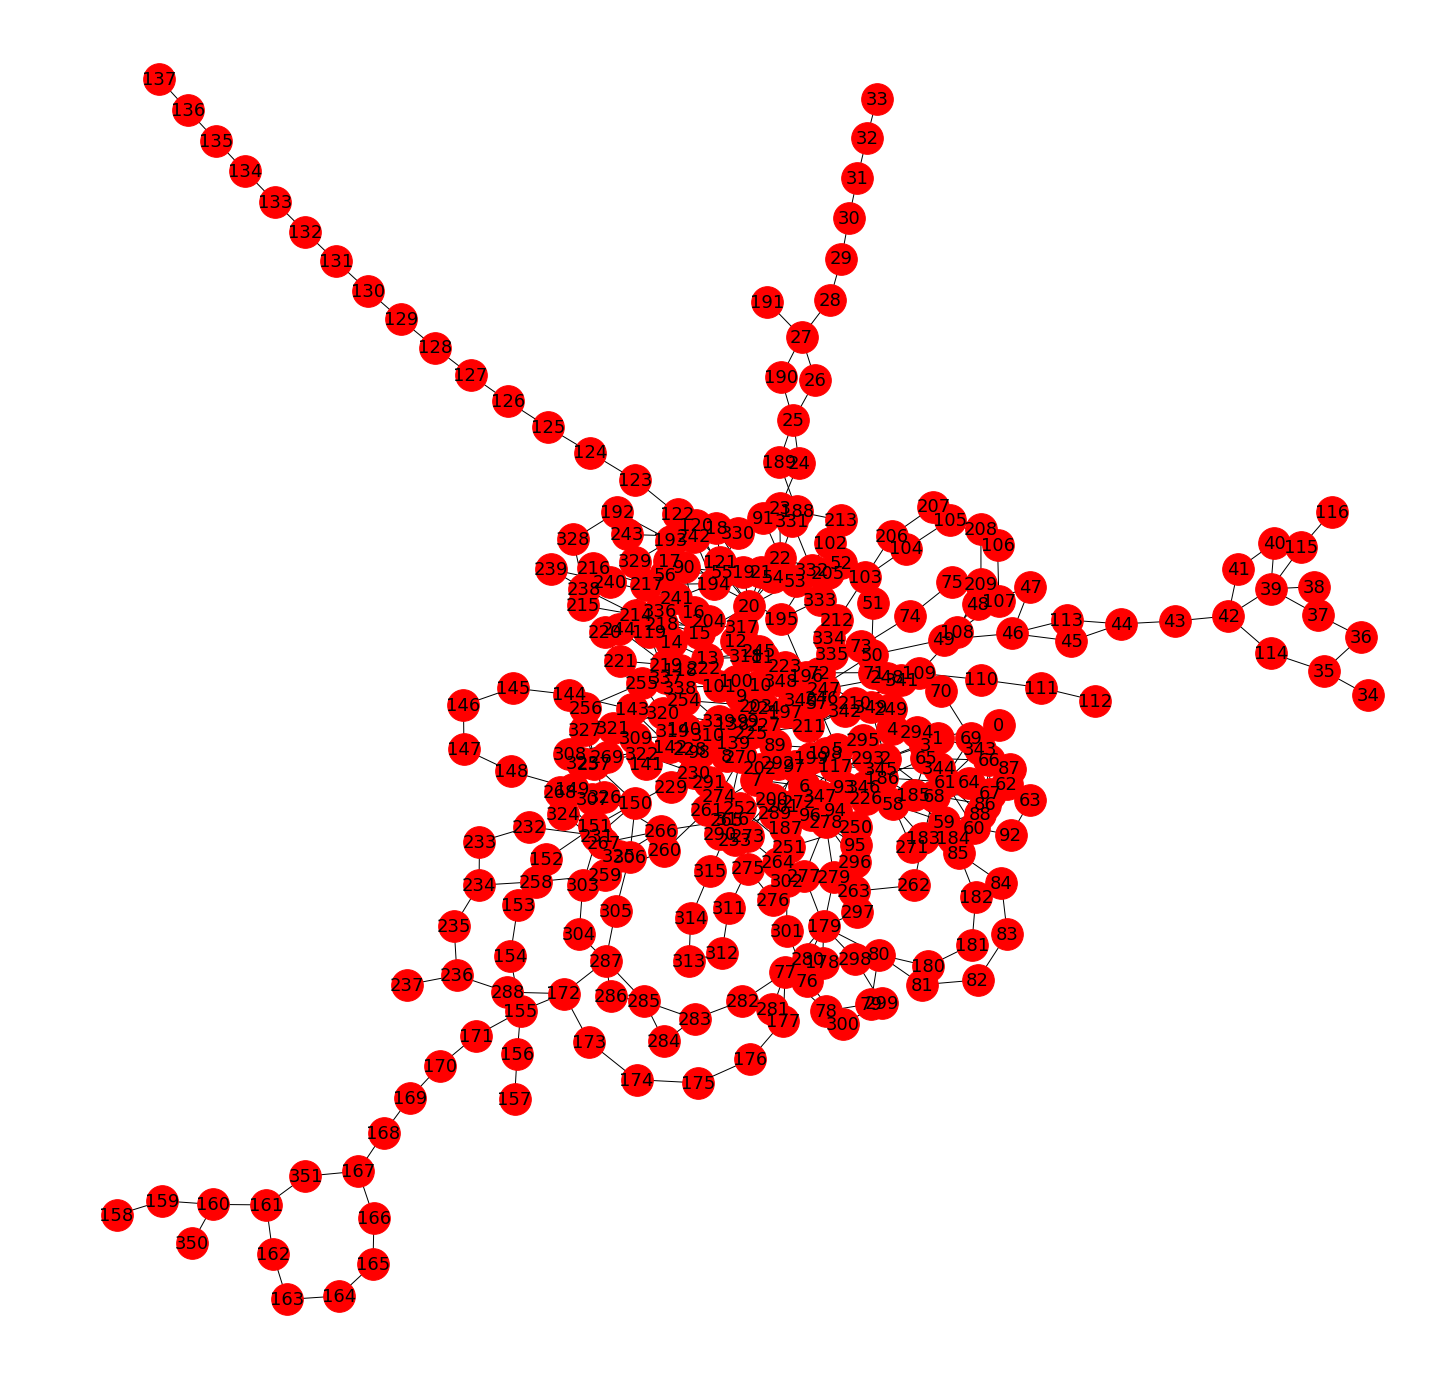

In [18]:
plt.figure(figsize=(25,25))
nx.draw_networkx(nyc_graph, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
plt.axis('off')

Нужно проверить графы на изоморфизм. Для этого я использовал два алгоритма: VF2 из networkx (по условию задания), и bliss (взял из обертки igraph, разобрался в его работе, но, к сожалению, не успел полностью культяписто переписать на python, придется устно рассказывать =( ). Для начала нужно в каждой паре выкинуть из большего графа вершин, пока их не останется столько же, сколько в меньшем, поскольку только в таком случае отображение одних вершин в другие будет являться уместным. Будем выкидывать по одной случайным образом, причем каждый раз проверять, что связность графа не нарушилась: связный и несвязный граф будут очевидным образом заведомо неизоморфны. 

Выведем сравнительную информацию о получившемся графе и сам граф. Начнем с "обрезки" Нью-Йоркского метро до размера Гамбургского: 

In [19]:
from graph_process import cut_graph, vf2, bliss, get_isomorphism_subgraph

100%|██████████| 264/264 [00:01<00:00, 240.79it/s]


Initial first graph
Name: 
Type: Graph
Number of nodes: 352
Number of edges: 505
Average degree:   2.8693
Cutted first graph
Name: 
Type: Graph
Number of nodes: 88
Number of edges: 88
Average degree:   2.0000
Second graph
Name: 
Type: Graph
Number of nodes: 88
Number of edges: 94
Average degree:   2.1364


(-0.6392433916216866,
 0.7840619434956798,
 -0.7582646775341566,
 0.8029617475698116)

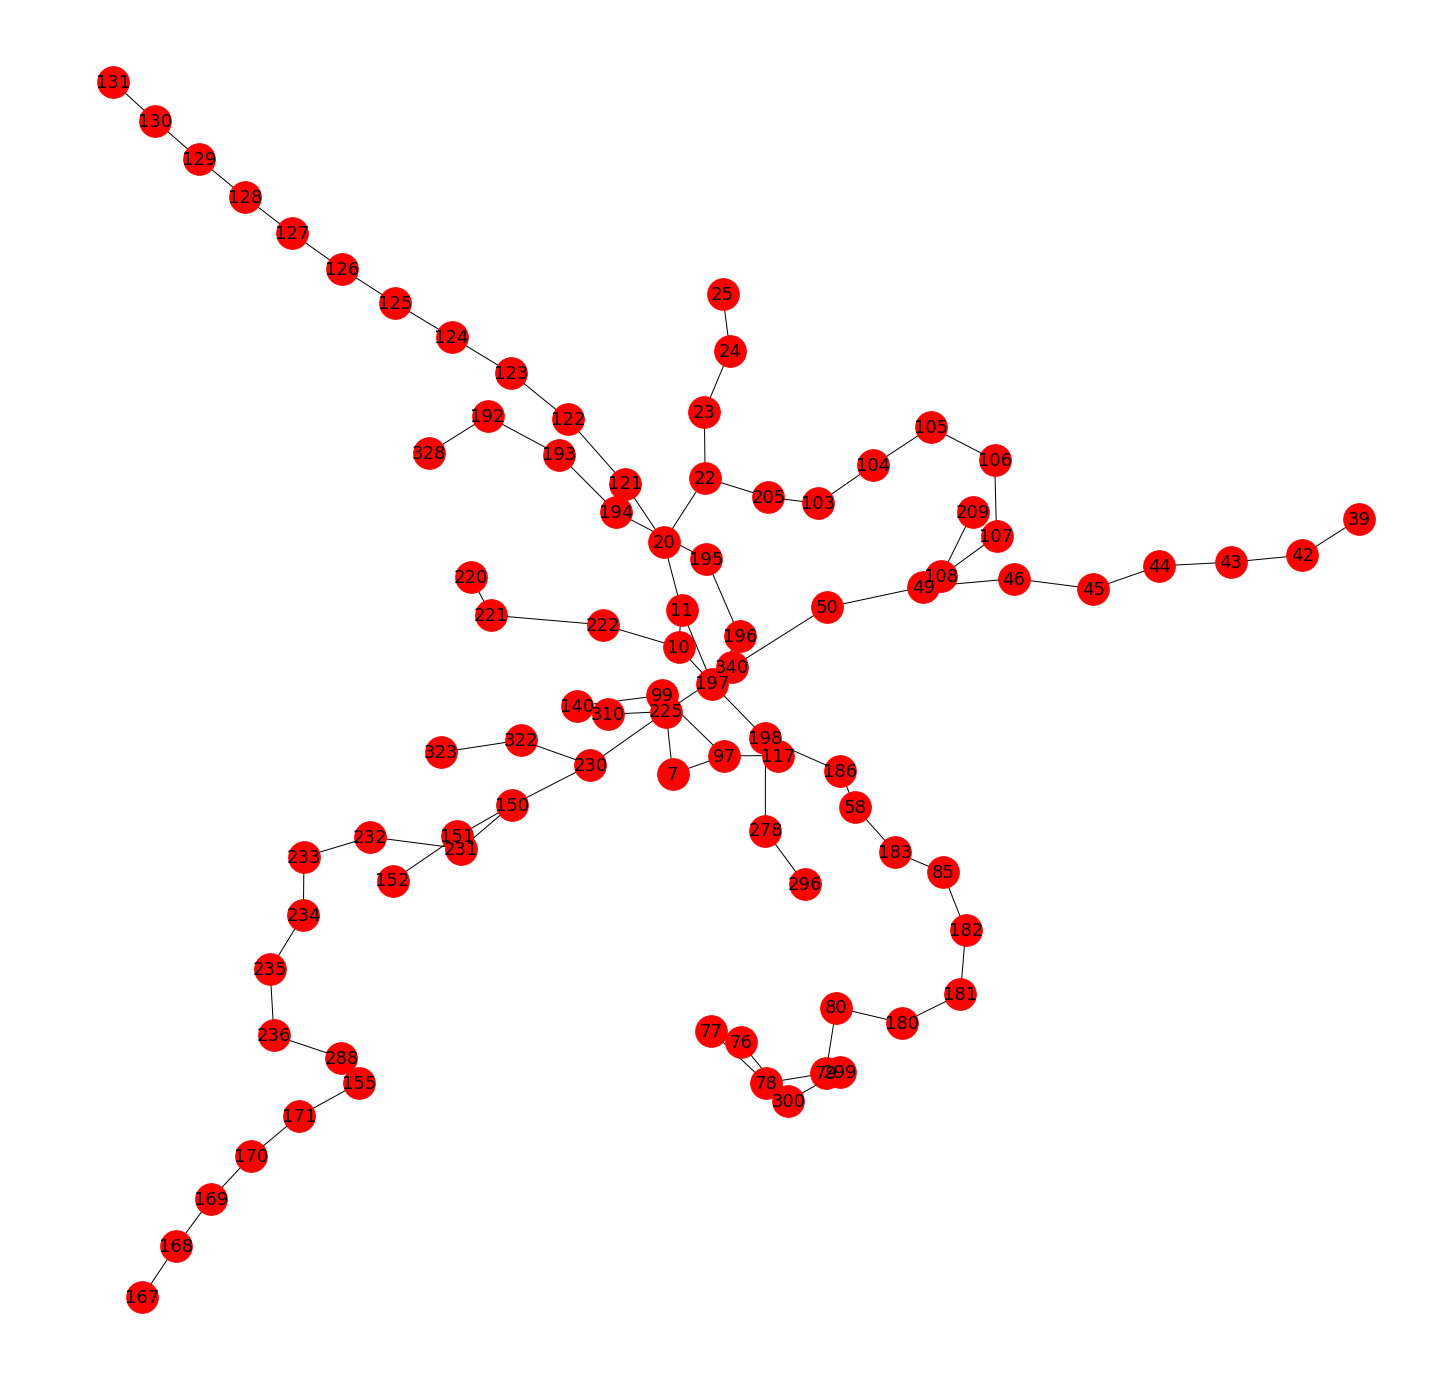

In [25]:
nyc_cut = cut_graph(nyc_graph, hh_graph)
plt.figure(figsize=(25,25))
nx.draw_networkx(nyc_cut, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
plt.axis('off')

Вот такой граф получился. Проверим его изоморфность схеме Гамбургского метрополитена.

In [26]:
print('VF2 Algorithm:')
vf2(nyc_cut, hh_graph)
print('Bliss Algorithm:')
bliss(nyc_cut, hh_graph)

VF2 Algorithm:
Graphs are not isomorphic
Bliss Algorithm:
Graphs are not isomorphic


По обоим алгоритмам эти графы неизоморфны. Теперь рассмотрим обрезку Нью-Йоркского до Гамбургского.

100%|██████████| 337/337 [00:01<00:00, 250.49it/s]


Initial first graph
Name: 
Type: Graph
Number of nodes: 352
Number of edges: 505
Average degree:   2.8693
Cutted first graph
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667
Second graph
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667


(-0.22619401126473637,
 0.17533349267615683,
 -0.4879893692436247,
 0.2720694980754871)

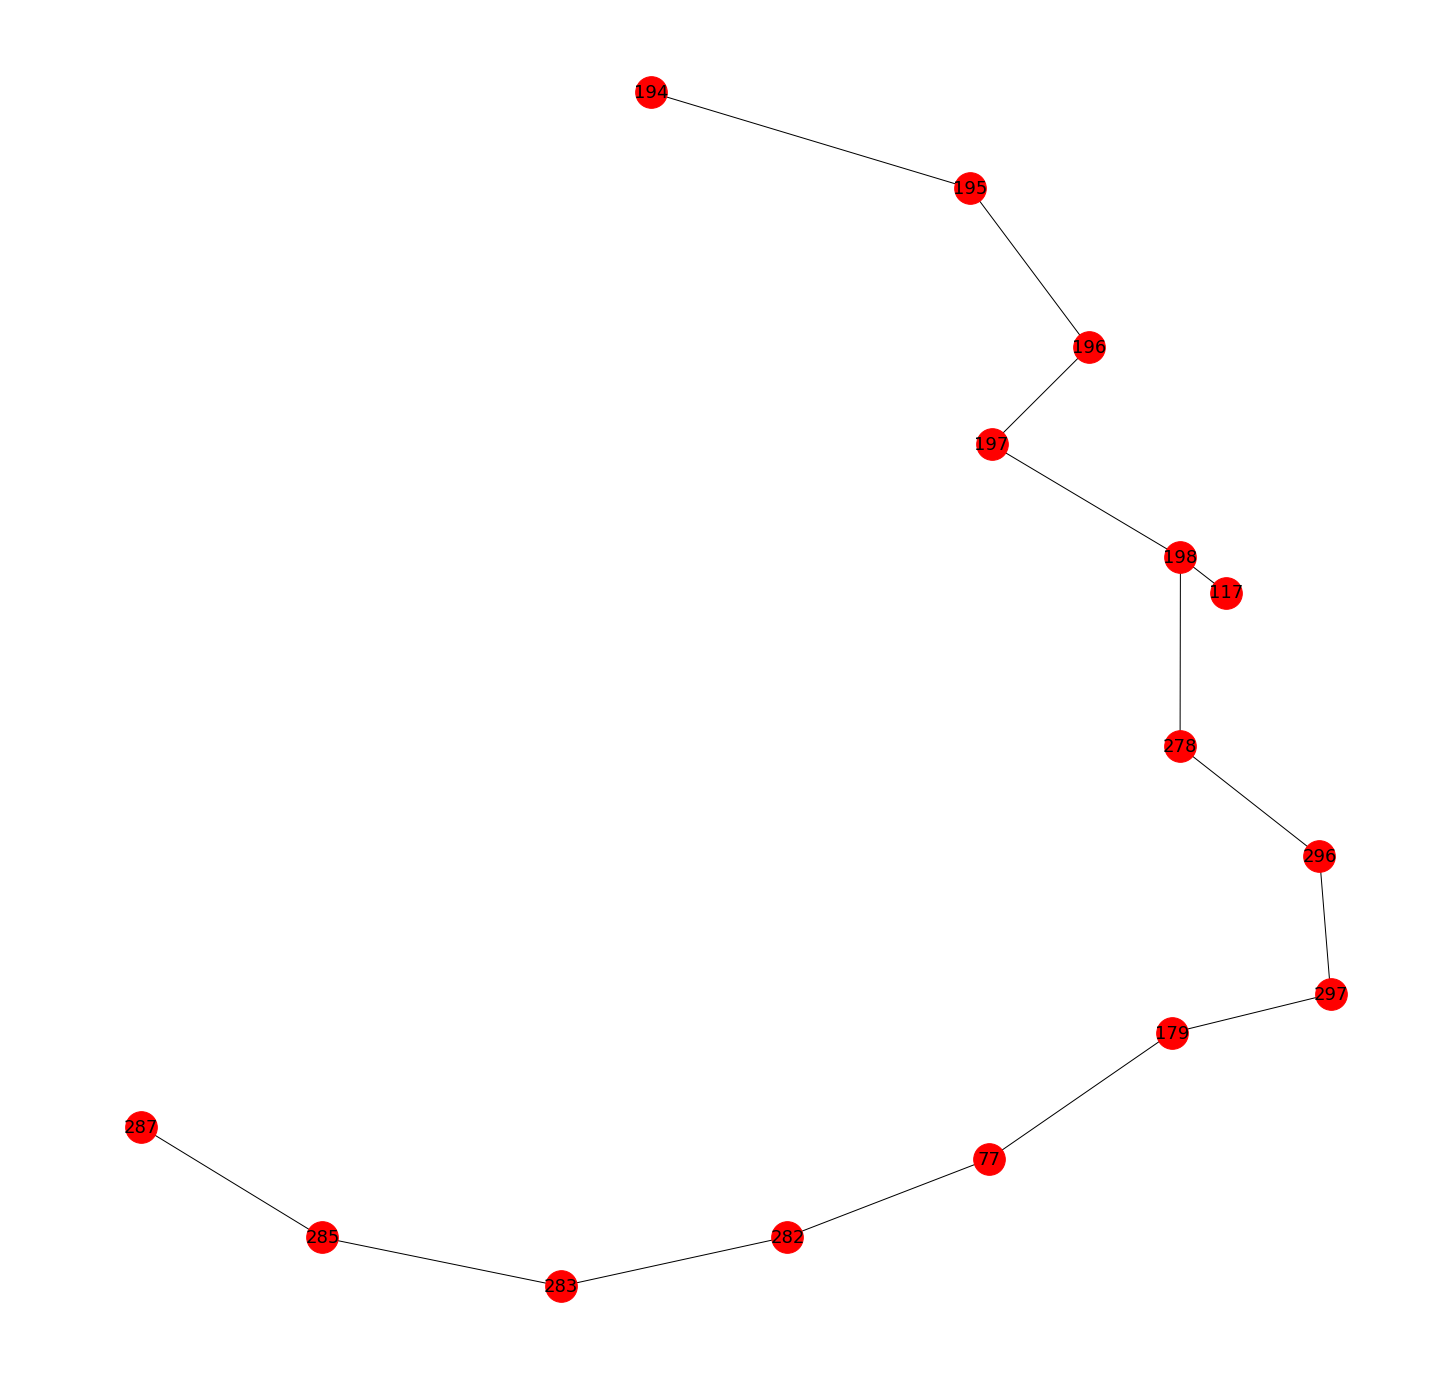

In [27]:
nyc_cut = cut_graph(nyc_graph, nn_graph)
plt.figure(figsize=(25,25))
nx.draw_networkx(nyc_cut, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
plt.axis('off')

In [28]:
print('VF2 Algorithm:')
vf2(nyc_cut, nn_graph)
print('Bliss Algorithm:')
bliss(nyc_cut, nn_graph)

VF2 Algorithm:
Graphs are not isomorphic
Bliss Algorithm:
Graphs are not isomorphic


И в этом случае графы оказались неизморфны. Наконец, случай со случайным подграфом графа Гамбурского метро и графом метро Нижнего Новгорода тоже не дает изоморфности.

100%|██████████| 73/73 [00:00<00:00, 362.08it/s]


Initial first graph
Name: 
Type: Graph
Number of nodes: 88
Number of edges: 94
Average degree:   2.1364
Cutted first graph
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667
Second graph
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 14
Average degree:   1.8667


(-0.1475046503611312,
 0.41823779422273744,
 -0.1892122370684715,
 0.45223171935485884)

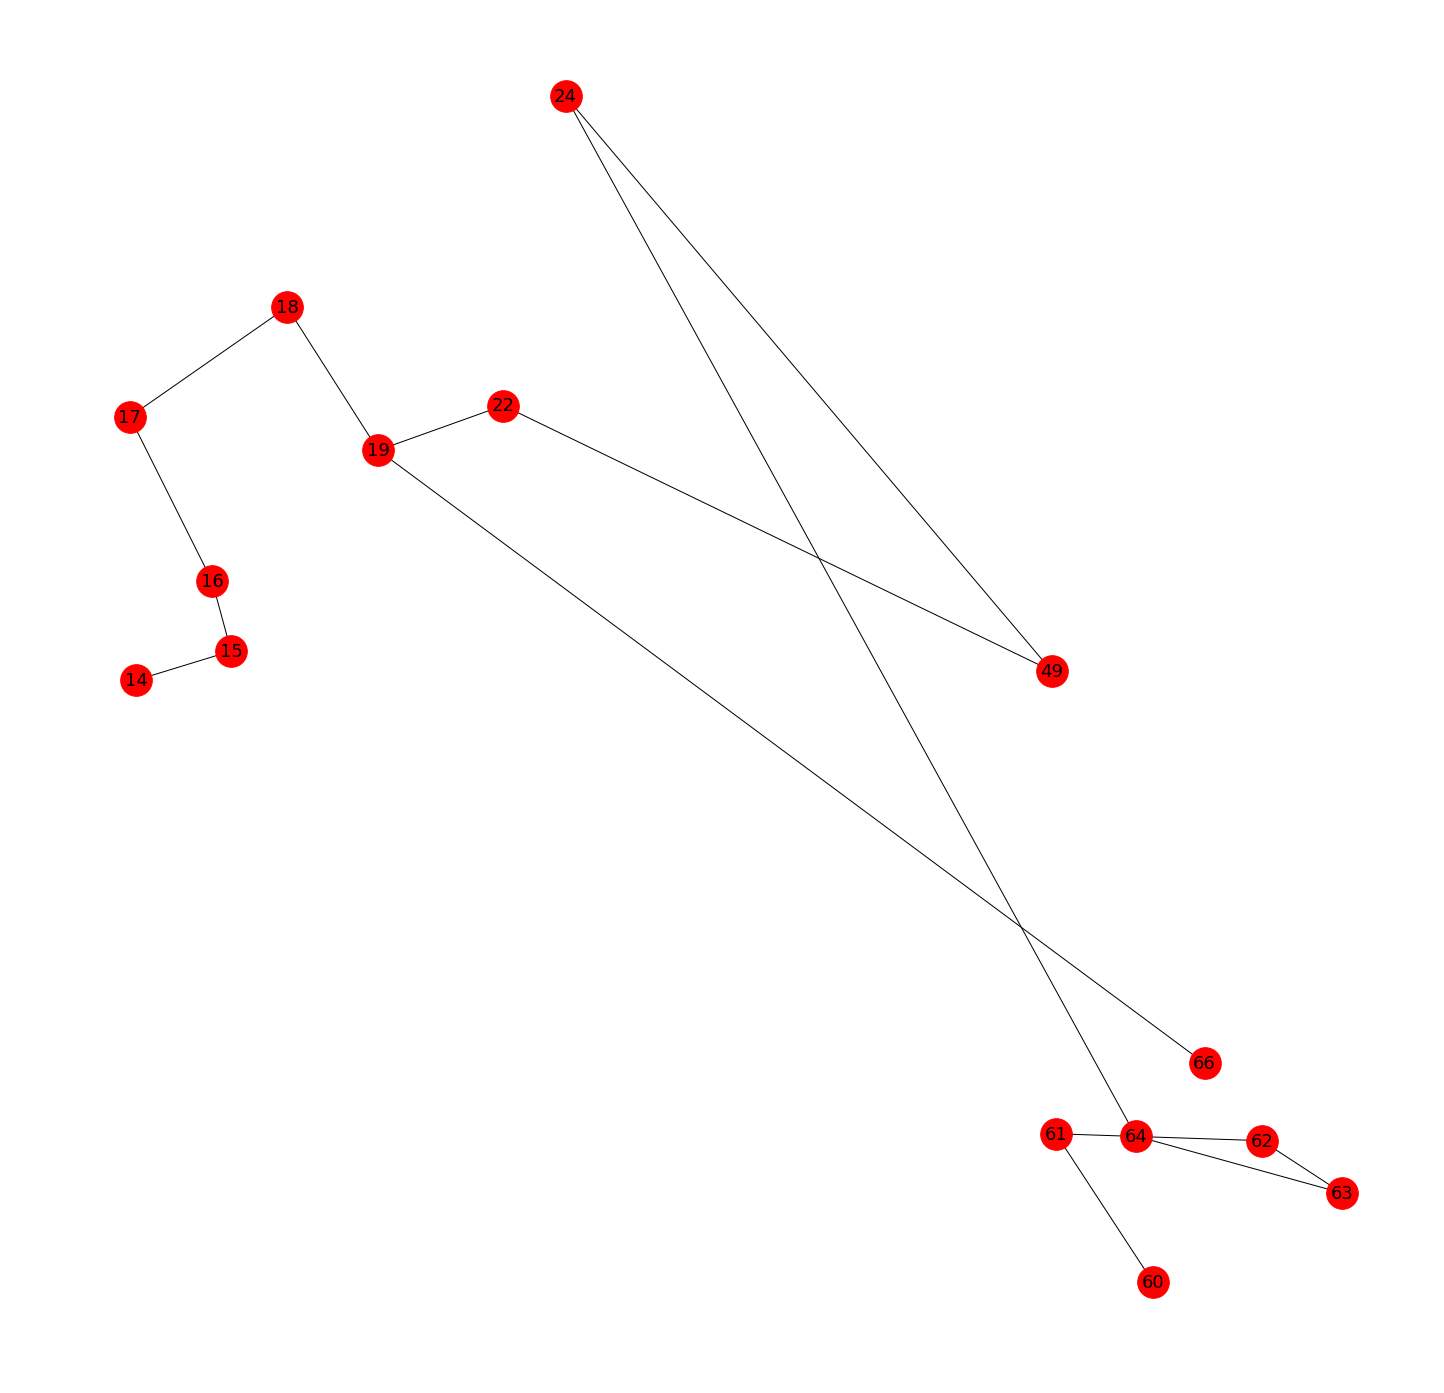

In [29]:
hh_cut = cut_graph(hh_graph, nn_graph)
plt.figure(figsize=(25,25))
nx.draw_networkx(hh_cut, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
plt.axis('off')

In [30]:
print('VF2 Algorithm:')
vf2(hh_cut, nn_graph)
print('Bliss Algorithm:')
bliss(hh_cut, nn_graph)

VF2 Algorithm:
Graphs are not isomorphic
Bliss Algorithm:
Graphs are not isomorphic


Теперь предъявим подграф "больших метро", изоморфный метро маленькому. Выделим такой в метро Гамбурга. На рисунке он изображен зеленым (к сожелаению, Layout не очень удачный).

{14: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 22: 6, 23: 7, 24: 8, 25: 9, 26: 10, 73: 11, 74: 12, 75: 13, 76: 14}


(-0.17694231616986558,
 0.9007919865168865,
 -0.5126102250677196,
 1.0520158735361858)

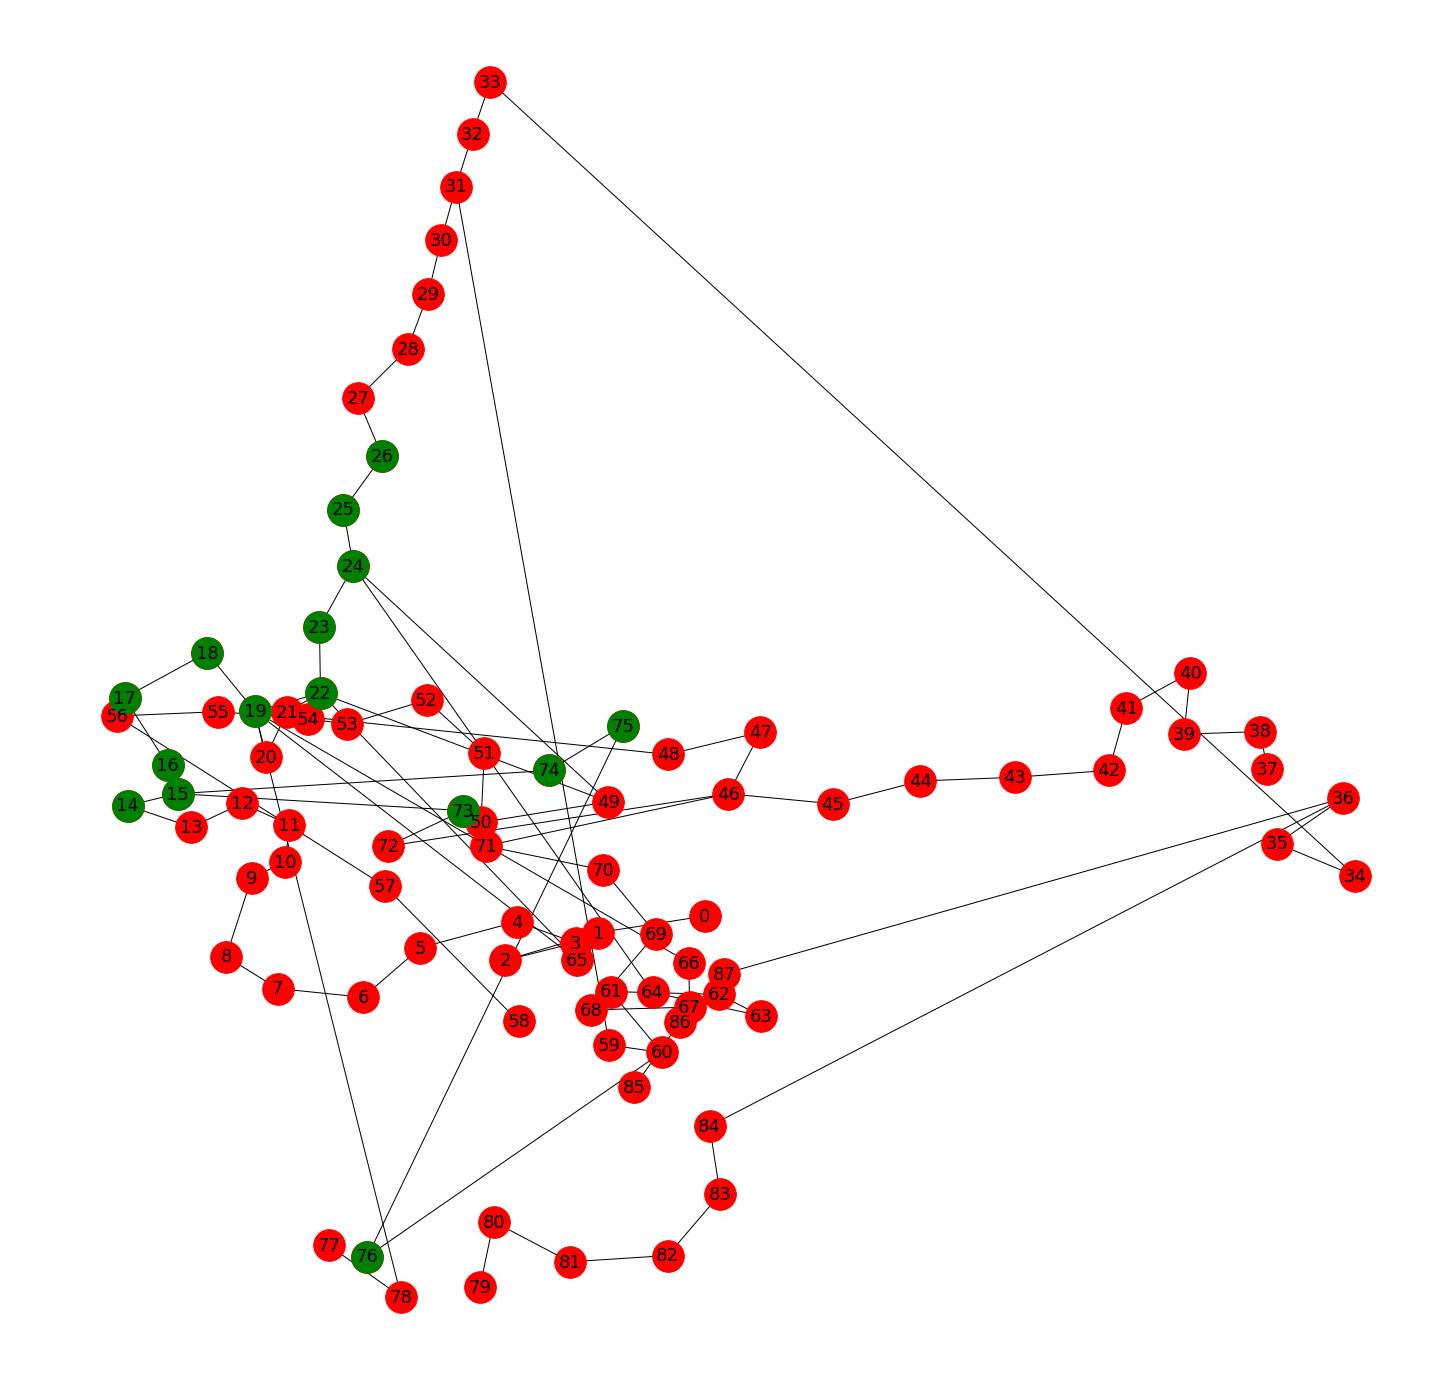

In [49]:
iso_subgraph = get_isomorphism_subgraph(hh_graph, nn_graph)
print(iso_subgraph)
plt.figure(figsize=(25,25))
nx.draw_networkx(hh_graph, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
nx.draw_networkx_nodes(hh_graph, nodelist=list(iso_subgraph.keys()), node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18, node_color='green')
plt.axis('off')

Также выделим изоморфный графу nn_graph подграф графа nyc_graph. И изобразим на рисунке.

{4: 0, 5: 1, 57: 2, 9: 3, 10: 4, 11: 5, 20: 6, 15: 7, 14: 8, 219: 9, 143: 10, 6: 11, 97: 12, 93: 13, 58: 14}


(-0.9596307908371743,
 0.9380628662629489,
 -0.978838846251713,
 1.1064190243061987)

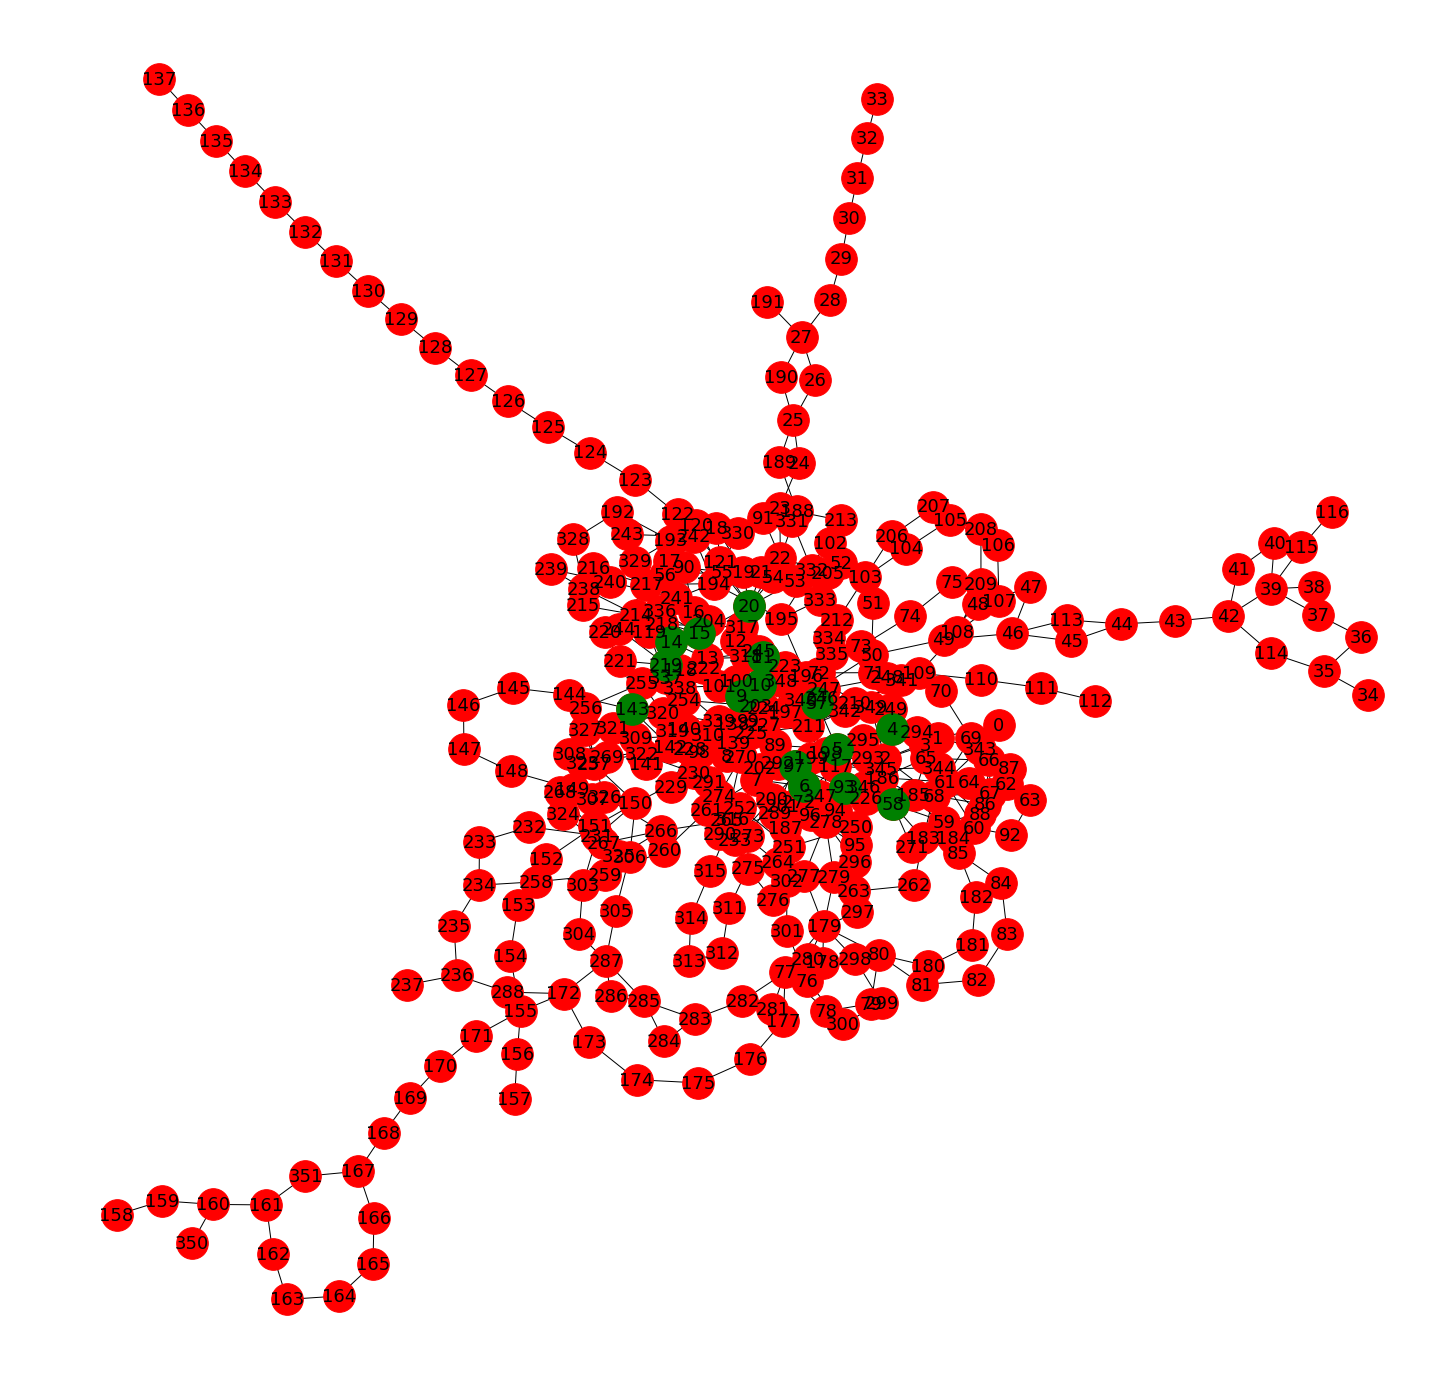

In [45]:
iso_subgraph = get_isomorphism_subgraph(nyc_graph, nn_graph)
print(iso_subgraph)
plt.figure(figsize=(25,25))
nx.draw_networkx(nyc_graph, node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18)
nx.draw_networkx_nodes(nyc_graph, nodelist=list(iso_subgraph.keys()), node_size=1000, pos=nx.kamada_kawai_layout(nyc_graph, scale=1), font_size=18, node_color='green')
plt.axis('off')